# Level 03 - Task 02 -    Customer Preference Analysis
### Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Choose Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


###  Customer Preference Analysis

<ipython-input-19-dcf90d583529>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated_cuisines["Cuisines"], x=top_rated_cuisines["Aggregate rating"], palette="viridis")


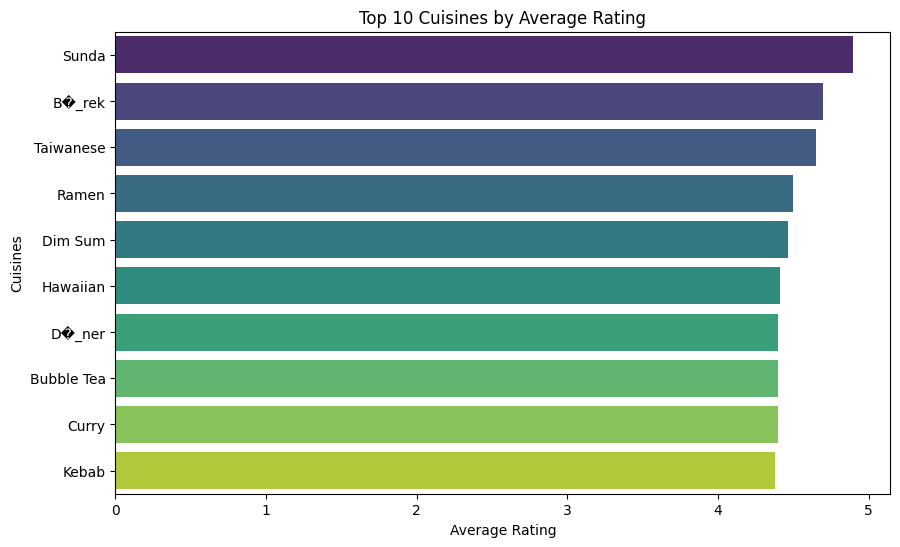

<ipython-input-19-dcf90d583529>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_popular_cuisines["Cuisines"], x=most_popular_cuisines["Votes"], palette="coolwarm")


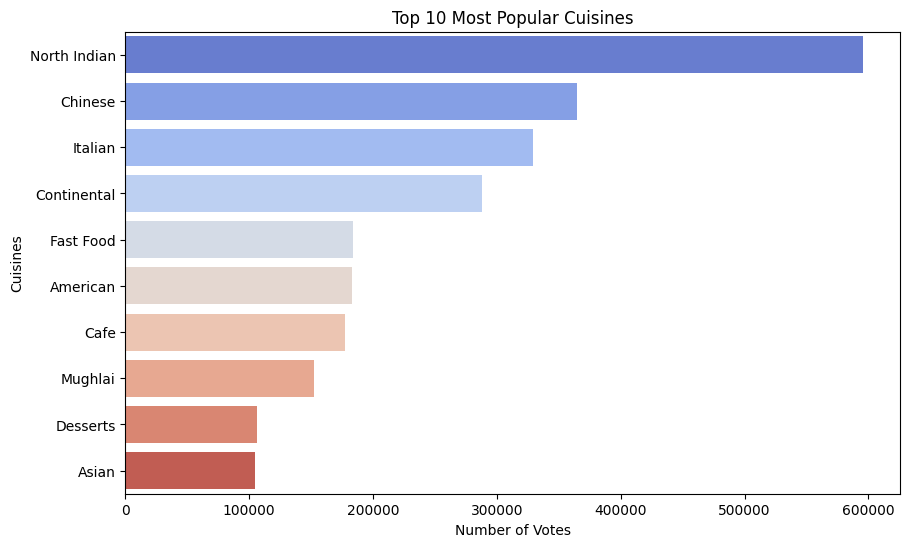

In [19]:
df = pd.read_csv('Dataset .csv')
df = df.dropna(subset=["Cuisines", "Aggregate rating", "Votes"])

df["Cuisines"] = df["Cuisines"].str.split(", ")
df = df.explode("Cuisines")

cuisine_rating = df.groupby("Cuisines")["Aggregate rating"].mean().reset_index()

cuisine_votes = df.groupby("Cuisines")["Votes"].sum().reset_index()

top_rated_cuisines = cuisine_rating.sort_values(by="Aggregate rating", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_rated_cuisines["Cuisines"], x=top_rated_cuisines["Aggregate rating"], palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Cuisines")
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

most_popular_cuisines = cuisine_votes.sort_values(by="Votes", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=most_popular_cuisines["Cuisines"], x=most_popular_cuisines["Votes"], palette="coolwarm")
plt.xlabel("Number of Votes")
plt.ylabel("Cuisines")
plt.title("Top 10 Most Popular Cuisines")
plt.show()
